## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile your model
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 83us/step - loss: 2.2661 - acc: 0.1561 - val_loss: 2.2133 - val_acc: 0.2109
Epoch 2/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.1829 - acc: 0.2216 - val_loss: 2.1535 - val_acc: 0.2434
Epoch 3/500
50000/50000 [==============================] - 4s 75us/step - loss: 2.1305 - acc: 0.2468 - val_loss: 2.1079 - val_acc: 0.2589
Epoch 4/500
50000/50000 [==============================] - 4s 76us/step - loss: 2.0884 - acc: 0.2617 - val_loss: 2.0692 - val_acc: 0.2696
Epoch 5/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.0525 - acc: 0.2754 - val_loss: 2.0364 - val_acc: 0.2786
Epoch 6/500
50000/50000 [==============================] - 4s 71us/step - loss: 2.0220 - acc: 0.2838 - val_loss: 2.0086 - val_acc: 0.2921
Epoch 7/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.9960 - acc: 0.2947 - val_loss: 1.9853 - 

50000/50000 [==============================] - 4s 72us/step - loss: 1.6521 - acc: 0.4264 - val_loss: 1.6586 - val_acc: 0.4243
Epoch 60/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.6490 - acc: 0.4278 - val_loss: 1.6559 - val_acc: 0.4236
Epoch 61/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.6458 - acc: 0.4275 - val_loss: 1.6552 - val_acc: 0.4216
Epoch 62/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.6430 - acc: 0.4288 - val_loss: 1.6508 - val_acc: 0.4256
Epoch 63/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.6400 - acc: 0.4299 - val_loss: 1.6468 - val_acc: 0.4262
Epoch 64/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.6369 - acc: 0.4318 - val_loss: 1.6453 - val_acc: 0.4268
Epoch 65/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.6341 - acc: 0.4335 - val_loss: 1.6425 - val_acc: 0.4281
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.5123 - acc: 0.4750 - val_loss: 1.5380 - val_acc: 0.4612
Epoch 119/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.5106 - acc: 0.4750 - val_loss: 1.5384 - val_acc: 0.4644
Epoch 120/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.5088 - acc: 0.4750 - val_loss: 1.5373 - val_acc: 0.4644
Epoch 121/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.5068 - acc: 0.4763 - val_loss: 1.5344 - val_acc: 0.4666
Epoch 122/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.5052 - acc: 0.4772 - val_loss: 1.5333 - val_acc: 0.4636
Epoch 123/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.5033 - acc: 0.4767 - val_loss: 1.5352 - val_acc: 0.4610
Epoch 124/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.5017 - acc: 0.4785 - val_loss: 1.5298 - val_acc: 0.4652
Epoch 125/500
50000/

50000/50000 [==============================] - 4s 72us/step - loss: 1.4198 - acc: 0.5060 - val_loss: 1.4701 - val_acc: 0.4825
Epoch 177/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.4188 - acc: 0.5060 - val_loss: 1.4703 - val_acc: 0.4808
Epoch 178/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.4167 - acc: 0.5053 - val_loss: 1.4725 - val_acc: 0.4831
Epoch 179/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.4157 - acc: 0.5073 - val_loss: 1.4662 - val_acc: 0.4831
Epoch 180/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.4145 - acc: 0.5081 - val_loss: 1.4694 - val_acc: 0.4839
Epoch 181/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.4127 - acc: 0.5092 - val_loss: 1.4785 - val_acc: 0.4802
Epoch 182/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.4113 - acc: 0.5083 - val_loss: 1.4648 - val_acc: 0.4841
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 1.3414 - acc: 0.5326 - val_loss: 1.4244 - val_acc: 0.4983
Epoch 235/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.3398 - acc: 0.5329 - val_loss: 1.4235 - val_acc: 0.4979
Epoch 236/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.3386 - acc: 0.5333 - val_loss: 1.4233 - val_acc: 0.5018
Epoch 237/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.3374 - acc: 0.5334 - val_loss: 1.4210 - val_acc: 0.4985
Epoch 238/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.3363 - acc: 0.5352 - val_loss: 1.4257 - val_acc: 0.4968
Epoch 239/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.3347 - acc: 0.5347 - val_loss: 1.4175 - val_acc: 0.4998
Epoch 240/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.3336 - acc: 0.5360 - val_loss: 1.4194 - val_acc: 0.4988
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 4s 71us/step - loss: 1.2709 - acc: 0.5564 - val_loss: 1.3864 - val_acc: 0.5105
Epoch 293/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2705 - acc: 0.5573 - val_loss: 1.3838 - val_acc: 0.5112
Epoch 294/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2690 - acc: 0.5575 - val_loss: 1.4016 - val_acc: 0.5017
Epoch 295/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2679 - acc: 0.5577 - val_loss: 1.4006 - val_acc: 0.5051
Epoch 296/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2662 - acc: 0.5595 - val_loss: 1.3959 - val_acc: 0.5066
Epoch 297/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2653 - acc: 0.5577 - val_loss: 1.4105 - val_acc: 0.5013
Epoch 298/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2646 - acc: 0.5588 - val_loss: 1.3930 - val_acc: 0.5085
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 1.2065 - acc: 0.5794 - val_loss: 1.3601 - val_acc: 0.5187
Epoch 351/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2050 - acc: 0.5787 - val_loss: 1.4050 - val_acc: 0.5069
Epoch 352/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2035 - acc: 0.5813 - val_loss: 1.3882 - val_acc: 0.5103
Epoch 353/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2031 - acc: 0.5809 - val_loss: 1.3900 - val_acc: 0.5085
Epoch 354/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2019 - acc: 0.5819 - val_loss: 1.3579 - val_acc: 0.5198
Epoch 355/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2005 - acc: 0.5812 - val_loss: 1.4477 - val_acc: 0.4877
Epoch 356/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1999 - acc: 0.5821 - val_loss: 1.3644 - val_acc: 0.5184
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 1.1458 - acc: 0.6010 - val_loss: 1.3653 - val_acc: 0.5146
Epoch 409/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1438 - acc: 0.6030 - val_loss: 1.3625 - val_acc: 0.5186
Epoch 410/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1437 - acc: 0.6018 - val_loss: 1.3508 - val_acc: 0.5242
Epoch 411/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1407 - acc: 0.6035 - val_loss: 1.3483 - val_acc: 0.5249
Epoch 412/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1402 - acc: 0.6031 - val_loss: 1.3660 - val_acc: 0.5190
Epoch 413/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1396 - acc: 0.6036 - val_loss: 1.3537 - val_acc: 0.5227
Epoch 414/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.1381 - acc: 0.6039 - val_loss: 1.3468 - val_acc: 0.5264
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 70us/step - loss: 1.0864 - acc: 0.6226 - val_loss: 1.4149 - val_acc: 0.5051
Epoch 467/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.0840 - acc: 0.6224 - val_loss: 1.3485 - val_acc: 0.5236
Epoch 468/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.0824 - acc: 0.6246 - val_loss: 1.3327 - val_acc: 0.5270
Epoch 469/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.0817 - acc: 0.6237 - val_loss: 1.3590 - val_acc: 0.5194
Epoch 470/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.0806 - acc: 0.6247 - val_loss: 1.3317 - val_acc: 0.5325
Epoch 471/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.0803 - acc: 0.6244 - val_loss: 1.3506 - val_acc: 0.5241
Epoch 472/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.0783 - acc: 0.6248 - val_loss: 1.3394 - val_acc: 0.5268
Epoch 473/500
50000/50000 [=======

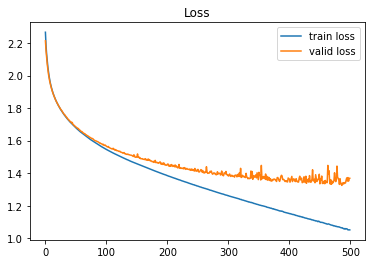

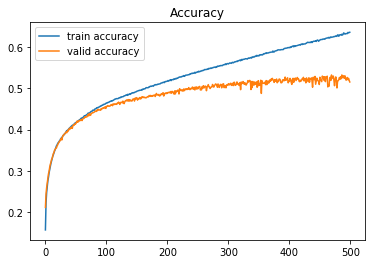

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()